In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #remove depricated warnings

In [31]:
df = sns.load_dataset('mpg') #miles per gallon

In [32]:
df.drop("name", axis =1, inplace=True)

In [33]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [34]:
df.isna().sum()
# 6 null values in horsepower

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [35]:
df['horsepower'].median()

93.5

In [36]:
# impute null values with mean or median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [37]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [38]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [40]:
# we have object origin column
# we convert object origin column to numerical origin column
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [41]:
df.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [42]:
df['origin'] = df['origin'].map({"usa":1, "japan": 2, "europe": 3})

In [43]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,3
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [44]:
X = df.drop('mpg', axis =1) # seperating mpg column into y
y = df['mpg']

In [45]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,3
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [46]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [48]:
X_train.shape, X_test.shape

((278, 7), (120, 7))

In [49]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model

LinearRegression()

In [50]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [51]:
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[i]}")

The coefficient for cylinders is -0.3176142302799369
The coefficient for displacement is 0.026237482599078946
The coefficient for horsepower is -0.018270764913124595
The coefficient for weight is -0.007487750398361897
The coefficient for acceleration is 0.0504067346197138
The coefficient for model_year is 0.8470951427061365
The coefficient for origin is 1.5190958387975024


In [52]:
from sklearn.metrics import r2_score
y_pred_linear = regression_model.predict(X_test)
r2_score(y_test, y_pred_linear)

0.8348001123742285

In [53]:
#ridge regression
# when to use?
# When there is a overfitting

# Ridge will reduce the magnitude of coefficient but never make to zero

from sklearn.linear_model import Ridge
ridge_regression_model = Ridge(alpha=100)
ridge_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {ridge_regression_model.coef_[i]}")
# none of the coeff has become zero

The coefficient for cylinders is -0.10121103813475338
The coefficient for displacement is 0.01549704723498359
The coefficient for horsepower is -0.015154146537673992
The coefficient for weight is -0.0072516011271230064
The coefficient for acceleration is 0.030640385245588053
The coefficient for model_year is 0.7914981246881716
The coefficient for origin is 0.7240611102907413


In [54]:
from sklearn.metrics import r2_score
y_pred = ridge_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8350365150570258

In [55]:
#lasso regression
# when to use?
# When we want to select the feature

# lasso will make coefficient to zero, hence helps in feature selection
from sklearn.linear_model import Lasso
lasso_regression_model = Lasso(alpha=0.5)
lasso_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lasso_regression_model.coef_[i]}")
# the coeff has become zero means below 3 features was removed
# features( cylinders, acceleration, origin) are not selected to build the model 
# but other features are selected to build the model
# but still r^2 still remains same or close to 0.83

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.006208198888300358
The coefficient for horsepower is -0.011058382987169565
The coefficient for weight is -0.0069826731680230885
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.744654952003819
The coefficient for origin is 0.0


In [56]:
from sklearn.metrics import r2_score
y_pred = lasso_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8277934716635555

In [57]:
# Always use Ridge and lasso in Multiple linear regression

In [58]:
from sklearn.linear_model import ElasticNet

# When to use?
# When we want both ridge and lasso
# Let algo decide which features need to be removed and which magnitude kept down

In [59]:
elastic_regression_model = ElasticNet(alpha=0.8, l1_ratio=0.4)
# be default l2 has 0.5 
# If we change value of L1 and L2 value is also changed
# the penality is a combination of L1 and L2
elastic_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {elastic_regression_model.coef_[i]}")

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.007991329781571462
The coefficient for horsepower is -0.013891824664720713
The coefficient for weight is -0.006988137750203173
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.736838267738092
The coefficient for origin is 0.20426289739925593


In [60]:
from sklearn.metrics import r2_score
y_pred = elastic_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8308672338152328

In [61]:
# CV => Cross Validation: Very Important
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
r2_score(y_test, y_pred)

0.8082805983844751

In [62]:
from sklearn.linear_model import LogisticRegressionCV

In [63]:
# Polynomial Regression

In [64]:
# np.random.seed(1)

In [65]:
X = 2*np.random.rand(100, 1)
X

array([[1.62746849],
       [1.44244933],
       [0.12066296],
       [0.02135645],
       [1.96559206],
       [1.21661925],
       [0.00236413],
       [0.94200904],
       [1.07797074],
       [1.12265251],
       [1.84422017],
       [1.30180118],
       [0.12707191],
       [0.61005236],
       [0.98343545],
       [0.82309416],
       [0.63573049],
       [0.97656465],
       [0.12543115],
       [0.22659323],
       [1.89767376],
       [1.50377143],
       [0.20281305],
       [1.1698755 ],
       [1.81506691],
       [1.28658827],
       [1.32908551],
       [0.45000745],
       [0.16289503],
       [0.18197595],
       [0.00768764],
       [1.91485537],
       [0.12958482],
       [1.52986609],
       [1.09150966],
       [0.99962179],
       [0.17509624],
       [0.02602898],
       [0.12974397],
       [0.01863813],
       [1.94420742],
       [0.2976793 ],
       [1.19938442],
       [0.82366585],
       [1.47569604],
       [1.27308058],
       [1.84189443],
       [1.348

In [66]:
Y = 4 + 3*X + 1.5*X**2 +  2*np.random.rand(100, 1)
Y

array([[13.46427966],
       [12.61739713],
       [ 5.23293857],
       [ 4.74986837],
       [16.52620256],
       [11.39177983],
       [ 5.73219981],
       [ 9.18860139],
       [ 9.55964004],
       [ 9.6886599 ],
       [16.55066275],
       [12.44303654],
       [ 5.50501727],
       [ 7.88316702],
       [ 9.87313717],
       [ 8.08532016],
       [ 8.23089475],
       [ 9.04460222],
       [ 5.98651853],
       [ 5.70469921],
       [15.60855689],
       [12.0945703 ],
       [ 4.88160731],
       [10.08839034],
       [15.17980952],
       [11.823685  ],
       [11.27282105],
       [ 6.64489047],
       [ 6.23939089],
       [ 6.5785611 ],
       [ 4.11818748],
       [15.44464953],
       [ 4.86539452],
       [12.81701314],
       [ 9.34553787],
       [10.06735213],
       [ 5.31620775],
       [ 4.20278658],
       [ 5.86254579],
       [ 4.75589418],
       [16.48013694],
       [ 6.44002084],
       [10.84163092],
       [ 7.98821676],
       [13.19924999],
       [11

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [68]:
# How to fit polynomial degree
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_train_poly
# output having 2 columns because of polynomial degree 2

array([[1.20662964e-01, 1.45595510e-02],
       [6.70296989e-01, 4.49298053e-01],
       [7.76194847e-01, 6.02478440e-01],
       [2.01303495e-01, 4.05230971e-02],
       [2.26593229e-01, 5.13444915e-02],
       [9.99621794e-01, 9.99243731e-01],
       [6.80453126e-01, 4.63016457e-01],
       [4.50007449e-01, 2.02506704e-01],
       [1.84189443e+00, 3.39257510e+00],
       [1.29743967e-01, 1.68334969e-02],
       [9.50992875e-01, 9.04387449e-01],
       [1.88851794e+00, 3.56650001e+00],
       [1.69302516e+00, 2.86633418e+00],
       [1.21718927e+00, 1.48154972e+00],
       [1.53243736e+00, 2.34836425e+00],
       [1.94420742e+00, 3.77994249e+00],
       [4.56835482e-01, 2.08698658e-01],
       [4.59365816e-03, 2.11016953e-05],
       [1.16987550e+00, 1.36860869e+00],
       [1.09150966e+00, 1.19139334e+00],
       [2.95359649e-01, 8.72373221e-02],
       [1.29678389e-01, 1.68164846e-02],
       [1.10216479e-02, 1.21476722e-04],
       [8.23094158e-01, 6.77483993e-01],
       [8.764908

In [69]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg

LinearRegression()

In [70]:
poly_reg.fit(X_train_poly, Y_train)

LinearRegression()

In [71]:
poly_reg.coef_

array([[2.98874588, 1.49171535]])

In [72]:
poly_reg.intercept_

array([5.05322132])

In [81]:
y_pred = poly_reg.predict(X_train_poly)
y_pred

array([[ 5.43557096],
       [ 7.72679348],
       [ 8.2717968 ],
       [ 5.71531523],
       [ 5.80704226],
       [ 9.53142404],
       [ 7.77761155],
       [ 6.70026158],
       [15.61893205],
       [ 5.46610385],
       [ 9.24458599],
       [16.01772434],
       [14.38899797],
       [10.90114119],
       [13.13637815],
       [16.50256146],
       [ 6.72990547],
       [ 5.06698207],
       [10.5912565 ],
       [10.09268606],
       [ 6.0661095 ],
       [ 5.46588248],
       [ 5.08634343],
       [ 8.52385386],
       [ 8.81881929],
       [ 6.07509441],
       [11.27580968],
       [ 6.36929244],
       [11.66058802],
       [ 7.09658797],
       [ 8.52696685],
       [16.03877629],
       [15.39240336],
       [16.69119648],
       [13.88960073],
       [ 8.79582733],
       [12.9208704 ],
       [ 5.06872796],
       [ 5.11773068],
       [10.9206233 ],
       [ 5.07628588],
       [ 6.62641264],
       [12.72920227],
       [10.78374338],
       [11.79506301],
       [16

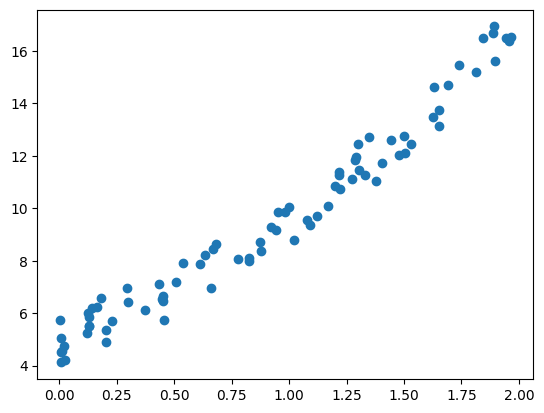

In [74]:
plt.scatter(X_train, Y_train, label="train data")
# data points are following linear shape

In [82]:
# calculate mean square error
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_train,y_pred)


###################################
# End of Linear Regression
###################################

0.31897250041252667